# Determining the historic electricity price for Czechia
By: Ilisa Goenka and Shafin Shabir


### Copied from SVK tryouts.ipynb

In [260]:
import re

import pypsa
import matplotlib.pyplot as plt
from icecream import ic
import os
from os.path import normpath, exists
os.path.isdir("/pypsa-eur")
os. getcwd()
import pandas as pd

In [261]:
n= pypsa.Network("E:\\Cerge-ei\\RA - electricity project\\pypsa-eur_v2\\results\\networks\\elec_s_100_ec_lv1_1H.nc")

INFO:pypsa.io:Imported network elec_s_100_ec_lv1_1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


(<matplotlib.collections.PatchCollection at 0x23b0f7a0f40>,
 <matplotlib.collections.LineCollection at 0x23b114b5130>)

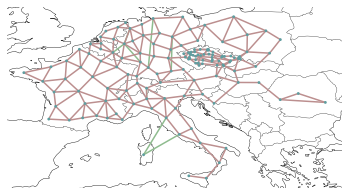

In [262]:
n.plot()

## Determining the prices
Understanding the components of the network

In [263]:
list(n.components)

['Network',
 'SubNetwork',
 'Bus',
 'Carrier',
 'GlobalConstraint',
 'Line',
 'LineType',
 'Transformer',
 'TransformerType',
 'Link',
 'Load',
 'Generator',
 'StorageUnit',
 'Store',
 'ShuntImpedance']

In [264]:
list(n.buses_t)

['v_mag_pu_set', 'p', 'q', 'v_mag_pu', 'v_ang', 'marginal_price']

Extracting the demand and marginal price of electricity over time from the solved network.

In [265]:
demand = n.loads_t.p #For the demand
demand

Load,AT0 0,AT0 1,AT0 2,BE0 0,BE0 1,BE0 2,BE0 3,CH0 0,CH0 1,CH0 2,...,PL0 4,PL0 5,PL0 6,PL0 7,RO0 0,RO0 1,RO0 2,SI0 0,SK0 0,SK0 1
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,1206.688055,2674.056400,2781.462492,3321.880102,2474.244983,2283.937926,2744.936989,3654.207552,1650.552340,1807.494822,...,3130.475049,2797.266638,1471.206926,2180.186526,2054.163218,3222.047329,1284.789454,1881.403053,1335.587778,1947.412222
2019-02-01 01:00:00,1187.094576,2630.636671,2736.298767,3200.359130,2383.732187,2200.386940,2644.521742,3649.242519,1648.424646,1802.553009,...,3068.289712,2741.700321,1441.982128,2136.878200,2040.387393,3200.439329,1276.173277,1852.519986,1324.196838,1930.803162
2019-02-01 02:00:00,1159.224541,2568.875850,2672.057262,3135.916191,2335.732977,2156.079599,2591.271233,3634.099447,1641.614633,1794.416224,...,3057.106645,2731.707581,1436.726502,2129.089869,2065.434346,3239.726601,1291.839053,1835.762347,1318.094548,1921.905452
2019-02-01 03:00:00,1186.756757,2629.888055,2735.520082,3090.192391,2301.676395,2124.642486,2553.488728,3591.240135,1622.177671,1774.904312,...,3118.420529,2786.495203,1465.541749,2171.791281,2122.729251,3329.596233,1327.674516,1858.125105,1344.130984,1959.869016
2019-02-01 04:00:00,1293.338527,2866.076407,2981.195171,3231.966858,2407.274657,2222.118636,2670.639849,3535.218028,1596.582694,1753.479232,...,3255.300320,2908.805480,1529.870163,2267.119776,2284.282096,3582.999133,1428.718771,2011.539895,1419.392555,2069.607445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,1421.709597,3150.550493,3277.095436,3433.581198,2557.443613,2360.737317,2837.237873,3914.785028,1766.649727,1971.026632,...,3967.906541,3545.561748,1864.768602,2763.406908,2591.107268,4064.268205,1620.624527,2395.424475,1557.304299,2270.695701
2019-02-27 20:00:00,1316.141283,2916.607988,3033.756402,3240.559250,2413.674551,2228.026281,2677.739917,3707.837068,1673.430273,1863.127906,...,3699.607261,3305.820299,1738.677913,2576.552688,2363.493085,3707.245128,1478.261788,2215.434327,1457.226750,2124.773250
2019-02-27 21:00:00,1271.887046,2818.539291,2931.748679,3183.788089,2371.389533,2188.993624,2630.828754,3512.426128,1585.510332,1759.023633,...,3439.991628,3073.838208,1616.668214,2395.746102,2216.029150,3475.941319,1386.029531,2059.674985,1379.931082,2012.068918


In [266]:
price = n.buses_t.marginal_price #For the Marginal Price
price

Bus,AT0 0,AT0 1,AT0 2,BE0 0,BE0 1,BE0 2,BE0 3,CH0 0,CH0 1,CH0 2,...,PL0 4,PL0 5,PL0 6,PL0 7,RO0 0,RO0 1,RO0 2,SI0 0,SK0 0,SK0 1
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,28.093735,28.399059,28.423769,28.622414,28.491358,28.511605,28.524984,28.050997,28.577049,27.753121,...,28.235951,28.207396,28.205480,28.254098,28.586327,28.586327,28.586327,29.369983,28.221914,28.304447
2019-02-01 01:00:00,28.079571,28.352996,28.361697,28.500387,28.394860,28.411078,28.421795,28.044474,28.465703,27.806512,...,28.224290,28.207396,28.206503,28.235914,28.506470,28.506470,28.506470,29.121442,28.228214,28.291378
2019-02-01 02:00:00,28.039857,28.352884,28.344477,28.319881,28.253955,28.264726,28.271844,27.994772,28.315546,27.806512,...,28.212130,28.207396,28.207879,28.218094,28.516374,28.516374,28.516374,29.129410,28.250446,28.311810
2019-02-01 03:00:00,28.093735,28.365459,28.367872,28.245329,28.218174,28.223737,28.227413,28.043067,28.264469,27.903530,...,28.213592,28.205935,28.206137,28.221099,28.524912,28.524912,28.524912,29.147557,28.246162,28.310948
2019-02-01 04:00:00,28.093735,28.399566,28.424081,28.622367,28.491301,28.511548,28.524927,28.050982,28.577031,27.753117,...,28.236492,28.208041,28.206137,28.254587,28.586894,28.586894,28.586894,29.370326,28.222721,28.305202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,31.674808,33.178710,32.983362,30.132366,30.535654,30.477691,30.439390,31.454205,30.699235,31.794096,...,28.754865,28.364026,28.302651,28.873406,38.864450,38.864450,38.864450,38.214474,26.777338,25.810844
2019-02-27 20:00:00,28.159383,28.755646,28.518625,28.059560,28.174366,28.164884,28.158619,28.068940,28.393530,27.806512,...,28.327448,28.284207,28.284068,28.365126,29.775331,29.775331,29.775331,33.194805,28.446462,28.735365
2019-02-27 21:00:00,28.117046,28.619335,28.344477,28.042267,28.148430,28.139569,28.133714,28.058655,28.379141,27.806512,...,28.255813,28.210935,28.210443,28.293635,29.662729,29.662729,29.662729,33.089562,28.361684,28.640707


In [267]:
price.sort_index(axis=1)

Bus,AT0 0,AT0 1,AT0 2,BE0 0,BE0 1,BE0 2,BE0 3,CH0 0,CH0 1,CH0 2,...,PL0 4,PL0 5,PL0 6,PL0 7,RO0 0,RO0 1,RO0 2,SI0 0,SK0 0,SK0 1
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,28.093735,28.399059,28.423769,28.622414,28.491358,28.511605,28.524984,28.050997,28.577049,27.753121,...,28.235951,28.207396,28.205480,28.254098,28.586327,28.586327,28.586327,29.369983,28.221914,28.304447
2019-02-01 01:00:00,28.079571,28.352996,28.361697,28.500387,28.394860,28.411078,28.421795,28.044474,28.465703,27.806512,...,28.224290,28.207396,28.206503,28.235914,28.506470,28.506470,28.506470,29.121442,28.228214,28.291378
2019-02-01 02:00:00,28.039857,28.352884,28.344477,28.319881,28.253955,28.264726,28.271844,27.994772,28.315546,27.806512,...,28.212130,28.207396,28.207879,28.218094,28.516374,28.516374,28.516374,29.129410,28.250446,28.311810
2019-02-01 03:00:00,28.093735,28.365459,28.367872,28.245329,28.218174,28.223737,28.227413,28.043067,28.264469,27.903530,...,28.213592,28.205935,28.206137,28.221099,28.524912,28.524912,28.524912,29.147557,28.246162,28.310948
2019-02-01 04:00:00,28.093735,28.399566,28.424081,28.622367,28.491301,28.511548,28.524927,28.050982,28.577031,27.753117,...,28.236492,28.208041,28.206137,28.254587,28.586894,28.586894,28.586894,29.370326,28.222721,28.305202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,31.674808,33.178710,32.983362,30.132366,30.535654,30.477691,30.439390,31.454205,30.699235,31.794096,...,28.754865,28.364026,28.302651,28.873406,38.864450,38.864450,38.864450,38.214474,26.777338,25.810844
2019-02-27 20:00:00,28.159383,28.755646,28.518625,28.059560,28.174366,28.164884,28.158619,28.068940,28.393530,27.806512,...,28.327448,28.284207,28.284068,28.365126,29.775331,29.775331,29.775331,33.194805,28.446462,28.735365
2019-02-27 21:00:00,28.117046,28.619335,28.344477,28.042267,28.148430,28.139569,28.133714,28.058655,28.379141,27.806512,...,28.255813,28.210935,28.210443,28.293635,29.662729,29.662729,29.662729,33.089562,28.361684,28.640707


Since we only want Czechia, we look extract the column index for Czechia. And only look at that data.

In [268]:
c_start= price.columns.get_loc("CZ0 0")

In [269]:
c_end= price.columns.get_loc("CZ0 9")

In [270]:
price_cz = price.iloc[:,c_start:c_end+1]
price_cz #price data for Czech Republic

Bus,CZ0 0,CZ0 1,CZ0 10,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,...,CZ0 44,CZ0 45,CZ0 46,CZ0 47,CZ0 48,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,27.771527,28.014695,28.848538,28.550149,28.619135,28.026968,26.542837,27.929824,27.749277,26.932089,...,28.326290,28.796953,27.612020,21.875903,27.596612,28.040400,28.827840,28.969678,26.217161,26.189750
2019-02-01 01:00:00,27.911631,28.080453,28.636485,28.432418,28.480054,28.079258,27.065994,28.013293,27.890305,27.332943,...,28.292459,28.601726,27.801734,23.877399,27.791134,28.096879,28.622347,28.719358,26.842688,26.823891
2019-02-01 02:00:00,28.008250,28.132958,28.485115,28.343367,28.377564,28.108368,27.404650,28.063189,27.978574,27.592956,...,28.279207,28.462292,27.929695,25.185585,27.922193,28.140666,28.475643,28.543207,27.247233,27.233978
2019-02-01 03:00:00,27.974742,28.116781,28.536898,28.373657,28.412583,28.097709,27.282659,28.044849,27.946655,27.499545,...,28.287468,28.510136,27.884908,24.715680,27.876342,28.126169,28.526191,28.604102,27.101309,27.086041
2019-02-01 04:00:00,27.773110,28.015821,28.847701,28.549925,28.618778,28.027901,26.546852,27.930965,27.750798,26.935317,...,28.326757,28.796230,27.613916,21.889567,27.598539,28.041454,28.827046,28.968592,26.221835,26.194480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,27.441177,28.101465,31.563870,30.817500,30.966168,29.108527,24.944818,28.820758,28.317199,25.907269,...,29.722851,31.404707,27.229619,12.298740,27.228274,27.797790,31.526305,31.888346,24.133761,24.065763
2019-02-27 20:00:00,27.204443,27.835626,29.820539,29.073644,29.248988,27.787179,24.053598,27.542341,27.090431,25.042400,...,28.596422,29.695166,26.792793,12.298740,26.752834,27.898338,29.771440,30.127858,23.226687,23.157071
2019-02-27 21:00:00,27.148653,27.761999,29.718860,28.987288,29.158496,27.723365,24.069492,27.483492,27.040705,25.036167,...,28.502580,29.595419,26.745795,12.565604,26.706536,27.827726,29.670432,30.019365,23.261054,23.192995


In [271]:
demand.sort_index(axis=1)

Load,AT0 0,AT0 1,AT0 2,BE0 0,BE0 1,BE0 2,BE0 3,CH0 0,CH0 1,CH0 2,...,PL0 4,PL0 5,PL0 6,PL0 7,RO0 0,RO0 1,RO0 2,SI0 0,SK0 0,SK0 1
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,1206.688055,2674.056400,2781.462492,3321.880102,2474.244983,2283.937926,2744.936989,3654.207552,1650.552340,1807.494822,...,3130.475049,2797.266638,1471.206926,2180.186526,2054.163218,3222.047329,1284.789454,1881.403053,1335.587778,1947.412222
2019-02-01 01:00:00,1187.094576,2630.636671,2736.298767,3200.359130,2383.732187,2200.386940,2644.521742,3649.242519,1648.424646,1802.553009,...,3068.289712,2741.700321,1441.982128,2136.878200,2040.387393,3200.439329,1276.173277,1852.519986,1324.196838,1930.803162
2019-02-01 02:00:00,1159.224541,2568.875850,2672.057262,3135.916191,2335.732977,2156.079599,2591.271233,3634.099447,1641.614633,1794.416224,...,3057.106645,2731.707581,1436.726502,2129.089869,2065.434346,3239.726601,1291.839053,1835.762347,1318.094548,1921.905452
2019-02-01 03:00:00,1186.756757,2629.888055,2735.520082,3090.192391,2301.676395,2124.642486,2553.488728,3591.240135,1622.177671,1774.904312,...,3118.420529,2786.495203,1465.541749,2171.791281,2122.729251,3329.596233,1327.674516,1858.125105,1344.130984,1959.869016
2019-02-01 04:00:00,1293.338527,2866.076407,2981.195171,3231.966858,2407.274657,2222.118636,2670.639849,3535.218028,1596.582694,1753.479232,...,3255.300320,2908.805480,1529.870163,2267.119776,2284.282096,3582.999133,1428.718771,2011.539895,1419.392555,2069.607445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,1421.709597,3150.550493,3277.095436,3433.581198,2557.443613,2360.737317,2837.237873,3914.785028,1766.649727,1971.026632,...,3967.906541,3545.561748,1864.768602,2763.406908,2591.107268,4064.268205,1620.624527,2395.424475,1557.304299,2270.695701
2019-02-27 20:00:00,1316.141283,2916.607988,3033.756402,3240.559250,2413.674551,2228.026281,2677.739917,3707.837068,1673.430273,1863.127906,...,3699.607261,3305.820299,1738.677913,2576.552688,2363.493085,3707.245128,1478.261788,2215.434327,1457.226750,2124.773250
2019-02-27 21:00:00,1271.887046,2818.539291,2931.748679,3183.788089,2371.389533,2188.993624,2630.828754,3512.426128,1585.510332,1759.023633,...,3439.991628,3073.838208,1616.668214,2395.746102,2216.029150,3475.941319,1386.029531,2059.674985,1379.931082,2012.068918


In [272]:
d_start= demand.columns.get_loc("CZ0 0")

In [273]:
d_end= demand.columns.get_loc("CZ0 9")

In [274]:
demand_cz = demand.iloc[:,d_start:d_end+1]
demand_cz #demand data for Czech Republic

Load,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,317.070648,228.714925,267.722147,128.247244,194.896053,320.154525,577.472408,570.310425,334.542884,389.447500,...,84.587346,245.924736,161.512955,379.802209,122.577322,108.963547,348.378855,173.374516,124.638836,132.735356
2019-02-01 01:00:00,312.670846,225.541184,264.007126,126.467633,192.191596,315.711931,569.459166,562.396566,329.900631,384.043368,...,83.413578,242.512185,159.271736,374.531919,120.876389,107.451525,343.544608,170.968701,122.909297,130.893466
2019-02-01 02:00:00,308.851780,222.786348,260.782455,124.922915,189.844104,311.855720,562.503602,555.527267,325.871115,379.352534,...,82.394737,239.550060,157.326338,369.957262,119.399965,106.139076,339.348440,168.880432,121.408042,129.294689
2019-02-01 03:00:00,314.881568,227.135860,265.873773,127.361815,193.550476,317.944154,573.485495,566.372960,332.233175,386.758725,...,84.003349,244.226853,160.397858,377.180026,121.731039,108.211255,345.973621,172.177525,123.778320,131.818941
2019-02-01 04:00:00,333.163307,240.323163,281.310164,134.756327,204.787842,336.403705,606.781545,599.256062,351.522333,409.213587,...,88.880507,258.406444,169.710412,399.078758,128.798633,114.493903,366.060537,182.173997,130.964778,139.472229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,355.758679,256.622050,300.388820,143.895597,218.676699,359.218843,647.933900,639.898034,375.362827,436.966744,...,94.908447,275.931752,181.220293,426.144563,137.533848,122.258960,390.887022,194.529167,139.846902,148.931335
2019-02-27 20:00:00,334.484290,241.276037,282.425551,135.290632,205.599820,337.737535,609.187415,601.632094,352.916108,410.836107,...,89.232916,259.431018,170.383309,400.661093,129.309316,114.947867,367.511956,182.896311,131.484049,140.025233
2019-02-27 21:00:00,314.900004,227.149158,265.889340,127.369272,193.561809,317.962770,573.519072,566.406120,332.252627,386.781370,...,84.008267,244.241153,160.407249,377.202110,121.738166,108.217591,345.993877,172.187606,123.785568,131.826659


Demand for some nodes are missing. So for now we only consider the nodes for which we get demand.

In [275]:
price_cz_bal = price_cz[(price_cz.columns) & (demand_cz.columns)]
price_cz_bal

<ipython-input-275-7a182ccffff1>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  price_cz_bal = price_cz[(price_cz.columns) & (demand_cz.columns)]


Bus,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,27.771527,28.014695,28.550149,28.619135,28.026968,26.542837,27.929824,27.749277,26.932089,27.108523,...,28.065896,28.072438,28.101974,28.054723,21.875903,28.040400,28.827840,28.969678,26.217161,26.189750
2019-02-01 01:00:00,27.911631,28.080453,28.432418,28.480054,28.079258,27.065994,28.013293,27.890305,27.332943,27.452973,...,28.113802,28.113927,28.140346,28.108837,23.877399,28.096879,28.622347,28.719358,26.842688,26.823891
2019-02-01 02:00:00,28.008250,28.132958,28.343367,28.377564,28.108368,27.404650,28.063189,27.978574,27.592956,27.675265,...,28.151024,28.141747,28.174645,28.155520,25.185585,28.140666,28.475643,28.543207,27.247233,27.233978
2019-02-01 03:00:00,27.974742,28.116781,28.373657,28.412583,28.097709,27.282659,28.044849,27.946655,27.499545,27.595300,...,28.138502,28.133021,28.164291,28.142037,24.715680,28.126169,28.526191,28.604102,27.101309,27.086041
2019-02-01 04:00:00,27.773110,28.015821,28.549925,28.618778,28.027901,26.546852,27.930965,27.750798,26.935317,27.111377,...,28.066888,28.073340,28.102925,28.055785,21.889567,28.041454,28.827046,28.968592,26.221835,26.194480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,27.441177,28.101465,30.817500,30.966168,29.108527,24.944818,28.820758,28.317199,25.907269,26.475504,...,27.876622,29.025761,28.017297,28.206262,12.298740,27.797790,31.526305,31.888346,24.133761,24.065763
2019-02-27 20:00:00,27.204443,27.835626,29.073644,29.248988,27.787179,24.053598,27.542341,27.090431,25.042400,25.481707,...,27.957764,27.928651,28.066262,27.943534,12.298740,27.898338,29.771440,30.127858,23.226687,23.157071
2019-02-27 21:00:00,27.148653,27.761999,28.987288,29.158496,27.723365,24.069492,27.483492,27.040705,25.036167,25.466311,...,27.886679,27.857305,27.990365,27.865849,12.565604,27.827726,29.670432,30.019365,23.261054,23.192995


Since the dimensions of the demand and price are same. Now we can calculate the weighted average price for Czechia. The Following set of codes calculated the weighted average price for Czech Electricity Market.

In [276]:
product = price_cz_bal*demand_cz
product

Bus,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,8805.536127,6407.378775,7643.507275,3670.325213,5462.345446,8497.809413,16128.702895,15825.702123,9009.938799,10557.346472,...,2374.019677,6903.706838,4538.832834,10655.245637,2681.489606,3055.381470,10043.009981,5022.603960,3267.676429,3476.305793
2019-02-01 01:00:00,8727.153406,6333.298526,7506.361080,3601.805030,5396.597344,8545.057202,15952.426516,15685.411918,9017.155008,10543.132087,...,2345.072799,6817.969903,4481.961810,10527.656771,2886.213728,3019.052468,9833.052976,4910.111326,3299.215928,3511.072115
2019-02-01 02:00:00,8650.397910,6267.638910,7391.452733,3545.008004,5336.207888,8546.296755,15785.644760,15542.860999,8991.747220,10498.681949,...,2319.496180,6741.357233,4432.613681,10416.339009,3007.157948,2986.824321,9663.165177,4820.389187,3308.033225,3521.208715
2019-02-01 03:00:00,8808.730579,6386.329329,7543.811254,3618.678088,5438.324908,8674.362029,16083.313871,15828.229883,9136.261101,10672.723218,...,2363.728419,6870.839186,4517.491911,10614.614087,3008.665357,3043.568037,9869.309651,4924.983504,3354.554554,3570.453200
2019-02-01 04:00:00,9252.981055,6732.850776,8031.384207,3856.561341,5739.773392,8930.459303,16947.994365,16629.834016,9468.365349,11094.343644,...,2494.599274,7254.331977,4769.358921,11196.467719,2819.346310,3210.575469,10552.443841,5277.324252,3434.136807,3653.402484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,9762.437066,7211.455537,9257.232441,4455.895265,6365.356572,8960.648571,18673.945909,18120.119752,9724.625733,11568.914750,...,2645.726845,8009.129215,5077.302821,12019.945094,1691.493040,3398.528871,12323.223542,6203.213428,3375.031683,3584.146257
2019-02-27 20:00:00,9099.458760,6716.069618,8211.140050,3957.114037,5713.038939,8123.802999,16778.447238,16298.472504,8837.866234,10468.805184,...,2494.752825,7245.558240,4782.022679,11195.886708,1590.341658,3206.854462,10941.360260,5510.274124,3053.938794,3242.574233
2019-02-27 21:00:00,8549.110794,6306.114610,7707.410998,3713.896369,5366.184740,7653.202292,15762.306871,15316.020879,8318.332270,9849.894814,...,2342.711613,6803.900344,4489.857392,10511.057118,1529.713646,3011.449479,10265.787702,5168.962648,2879.382812,3057.455079


In [277]:
aggregation = product.sum(axis=1)
aggregation

snapshot
2019-02-01 00:00:00    219266.512655
2019-02-01 01:00:00    217432.033167
2019-02-01 02:00:00    215565.258654
2019-02-01 03:00:00    219492.478397
2019-02-01 04:00:00    230408.891003
                           ...      
2019-02-27 19:00:00    248013.034146
2019-02-27 20:00:00    225608.180189
2019-02-27 21:00:00    211991.587148
2019-02-27 22:00:00    202307.742318
2019-02-27 23:00:00    200391.235179
Length: 648, dtype: float64

In [278]:
sum_weight= demand_cz.sum(axis=1)
weighted_price= aggregation/sum_weight
weighted_price

snapshot
2019-02-01 00:00:00    27.715716
2019-02-01 01:00:00    27.870578
2019-02-01 02:00:00    27.972964
2019-02-01 03:00:00    27.937159
2019-02-01 04:00:00    27.717363
                         ...    
2019-02-27 19:00:00    27.940156
2019-02-27 20:00:00    27.032671
2019-02-27 21:00:00    26.980860
2019-02-27 22:00:00    27.108825
2019-02-27 23:00:00    27.926601
Length: 648, dtype: float64

<AxesSubplot:xlabel='snapshot'>

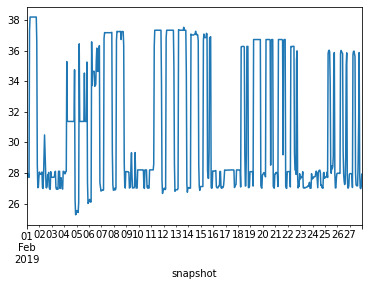

In [279]:
weighted_price.plot() #weighted price for Czech Republic generated by network

### Adding Actual Prices Data

Importing the data as a pandas dataframe and setting up the data inorder to merge it with the predicted prices for comparison.

In [280]:
df = pd.read_excel("E:\\Cerge-ei\\RA - electricity project\\pypsa-eur_v2\\2019_hourly_price_data.xlsx")
df

,Date,Hour,czk
0,2019-02-01,00:00:00,43.40
1,2019-02-01,01:00:00,42.67
2,2019-02-01,02:00:00,41.20
3,2019-02-01,03:00:00,40.39
4,2019-02-01,04:00:00,40.36
...,...,...,...
643,2019-02-27,19:00:00,52.60
644,2019-02-27,20:00:00,48.12
645,2019-02-27,21:00:00,42.00
646,2019-02-27,22:00:00,40.36


In [281]:
df["snapshot"] = df["Date"].astype(str) + " " + df["Hour"].astype(str)
df

,Date,Hour,czk,snapshot
0,2019-02-01,00:00:00,43.40,2019-02-01 00:00:00
1,2019-02-01,01:00:00,42.67,2019-02-01 01:00:00
2,2019-02-01,02:00:00,41.20,2019-02-01 02:00:00
3,2019-02-01,03:00:00,40.39,2019-02-01 03:00:00
4,2019-02-01,04:00:00,40.36,2019-02-01 04:00:00
...,...,...,...,...
643,2019-02-27,19:00:00,52.60,2019-02-27 19:00:00
644,2019-02-27,20:00:00,48.12,2019-02-27 20:00:00
645,2019-02-27,21:00:00,42.00,2019-02-27 21:00:00
646,2019-02-27,22:00:00,40.36,2019-02-27 22:00:00


In [282]:
df1 = df.drop(['Date', 'Hour'], axis = 1)
df1

,czk,snapshot
0,43.40,2019-02-01 00:00:00
1,42.67,2019-02-01 01:00:00
2,41.20,2019-02-01 02:00:00
3,40.39,2019-02-01 03:00:00
4,40.36,2019-02-01 04:00:00
...,...,...
643,52.60,2019-02-27 19:00:00
644,48.12,2019-02-27 20:00:00
645,42.00,2019-02-27 21:00:00
646,40.36,2019-02-27 22:00:00


In [283]:
df2 = df1.set_index('snapshot')
df2

,czk
snapshot,
2019-02-01 00:00:00,43.40
2019-02-01 01:00:00,42.67
2019-02-01 02:00:00,41.20
2019-02-01 03:00:00,40.39
2019-02-01 04:00:00,40.36
...,...
2019-02-27 19:00:00,52.60
2019-02-27 20:00:00,48.12
2019-02-27 21:00:00,42.00


In [284]:
df2.rename(columns = {'czk':'Actual'}, inplace = True)
df2

,Actual
snapshot,
2019-02-01 00:00:00,43.40
2019-02-01 01:00:00,42.67
2019-02-01 02:00:00,41.20
2019-02-01 03:00:00,40.39
2019-02-01 04:00:00,40.36
...,...
2019-02-27 19:00:00,52.60
2019-02-27 20:00:00,48.12
2019-02-27 21:00:00,42.00


In [285]:
df6 = weighted_price.to_frame() #converted weighted price data to dataframe
df6

,0
snapshot,
2019-02-01 00:00:00,27.715716
2019-02-01 01:00:00,27.870578
2019-02-01 02:00:00,27.972964
2019-02-01 03:00:00,27.937159
2019-02-01 04:00:00,27.717363
...,...
2019-02-27 19:00:00,27.940156
2019-02-27 20:00:00,27.032671
2019-02-27 21:00:00,26.980860


In [286]:
df6.rename(columns = {0:'Predicted'}, inplace = True)
df6

,Predicted
snapshot,
2019-02-01 00:00:00,27.715716
2019-02-01 01:00:00,27.870578
2019-02-01 02:00:00,27.972964
2019-02-01 03:00:00,27.937159
2019-02-01 04:00:00,27.717363
...,...
2019-02-27 19:00:00,27.940156
2019-02-27 20:00:00,27.032671
2019-02-27 21:00:00,26.980860


## For merging files


df2,data1 - data frame of actual data
df6,data2 - data frame of weighted price

Resetting index column for both data

In [287]:
data1 = df2
data1

,Actual
snapshot,
2019-02-01 00:00:00,43.40
2019-02-01 01:00:00,42.67
2019-02-01 02:00:00,41.20
2019-02-01 03:00:00,40.39
2019-02-01 04:00:00,40.36
...,...
2019-02-27 19:00:00,52.60
2019-02-27 20:00:00,48.12
2019-02-27 21:00:00,42.00


In [288]:
data1.reset_index(inplace=True)
data1

,snapshot,Actual
0,2019-02-01 00:00:00,43.40
1,2019-02-01 01:00:00,42.67
2,2019-02-01 02:00:00,41.20
3,2019-02-01 03:00:00,40.39
4,2019-02-01 04:00:00,40.36
...,...,...
643,2019-02-27 19:00:00,52.60
644,2019-02-27 20:00:00,48.12
645,2019-02-27 21:00:00,42.00
646,2019-02-27 22:00:00,40.36


In [289]:
data1.dtypes

snapshot     object
Actual      float64
dtype: object

In [290]:
data2 = df6
data2

,Predicted
snapshot,
2019-02-01 00:00:00,27.715716
2019-02-01 01:00:00,27.870578
2019-02-01 02:00:00,27.972964
2019-02-01 03:00:00,27.937159
2019-02-01 04:00:00,27.717363
...,...
2019-02-27 19:00:00,27.940156
2019-02-27 20:00:00,27.032671
2019-02-27 21:00:00,26.980860


In [291]:
data2.reset_index(inplace=True)
data2

,snapshot,Predicted
0,2019-02-01 00:00:00,27.715716
1,2019-02-01 01:00:00,27.870578
2,2019-02-01 02:00:00,27.972964
3,2019-02-01 03:00:00,27.937159
4,2019-02-01 04:00:00,27.717363
...,...,...
643,2019-02-27 19:00:00,27.940156
644,2019-02-27 20:00:00,27.032671
645,2019-02-27 21:00:00,26.980860
646,2019-02-27 22:00:00,27.108825


In [292]:
data2.dtypes

snapshot     datetime64[ns]
Predicted           float64
dtype: object

In [293]:
data1['snapshot'] = pd.to_datetime(data1['snapshot'], infer_datetime_format=True) #changing dates from object to datetime since column formats don't match
data1

,snapshot,Actual
0,2019-02-01 00:00:00,43.40
1,2019-02-01 01:00:00,42.67
2,2019-02-01 02:00:00,41.20
3,2019-02-01 03:00:00,40.39
4,2019-02-01 04:00:00,40.36
...,...,...
643,2019-02-27 19:00:00,52.60
644,2019-02-27 20:00:00,48.12
645,2019-02-27 21:00:00,42.00
646,2019-02-27 22:00:00,40.36


In [294]:
data1.dtypes

snapshot    datetime64[ns]
Actual             float64
dtype: object

In [295]:
finaldata = pd.concat([data2, data1], axis=1)
finaldata #merged data

,snapshot,Predicted,snapshot,Actual
0,2019-02-01 00:00:00,27.715716,2019-02-01 00:00:00,43.40
1,2019-02-01 01:00:00,27.870578,2019-02-01 01:00:00,42.67
2,2019-02-01 02:00:00,27.972964,2019-02-01 02:00:00,41.20
3,2019-02-01 03:00:00,27.937159,2019-02-01 03:00:00,40.39
4,2019-02-01 04:00:00,27.717363,2019-02-01 04:00:00,40.36
...,...,...,...,...
643,2019-02-27 19:00:00,27.940156,2019-02-27 19:00:00,52.60
644,2019-02-27 20:00:00,27.032671,2019-02-27 20:00:00,48.12
645,2019-02-27 21:00:00,26.980860,2019-02-27 21:00:00,42.00
646,2019-02-27 22:00:00,27.108825,2019-02-27 22:00:00,40.36


## Plot
data1,df2 = actual data (czk) #data2,df6 = weighted price (0)

<AxesSubplot:title={'center':'Predicted versus Actual Electricity Prices'}, xlabel='Time', ylabel='Price in Eur/MWH'>

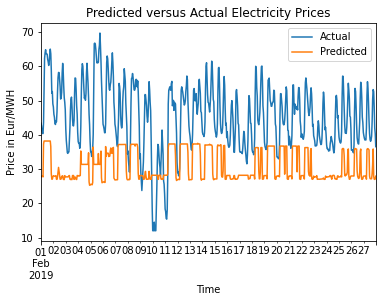

In [296]:
ax = data1.plot(x='snapshot', y='Actual')
data2.plot(ax=ax, x='snapshot', y = 'Predicted', ylabel = 'Price in Eur/MWH', xlabel = 'Time', title= 'Predicted versus Actual Electricity Prices')